In [30]:
NAME = "Luuk Stiphout, 2014800, U346564"
COLLABORATORS = "Casha van Wanrooij, 2014934, U581640"

# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [31]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [32]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

head(df1)

V1,epsilon,response,group
3.588198,-3.3733866,-7.549782,1
8.094746,1.6755741,-11.513918,2
4.680792,0.3067462,-6.054838,1
8.947157,-2.2762739,-17.170587,2
9.464206,2.5076298,-13.420781,2
1.410008,0.8529284,1.032911,1


## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

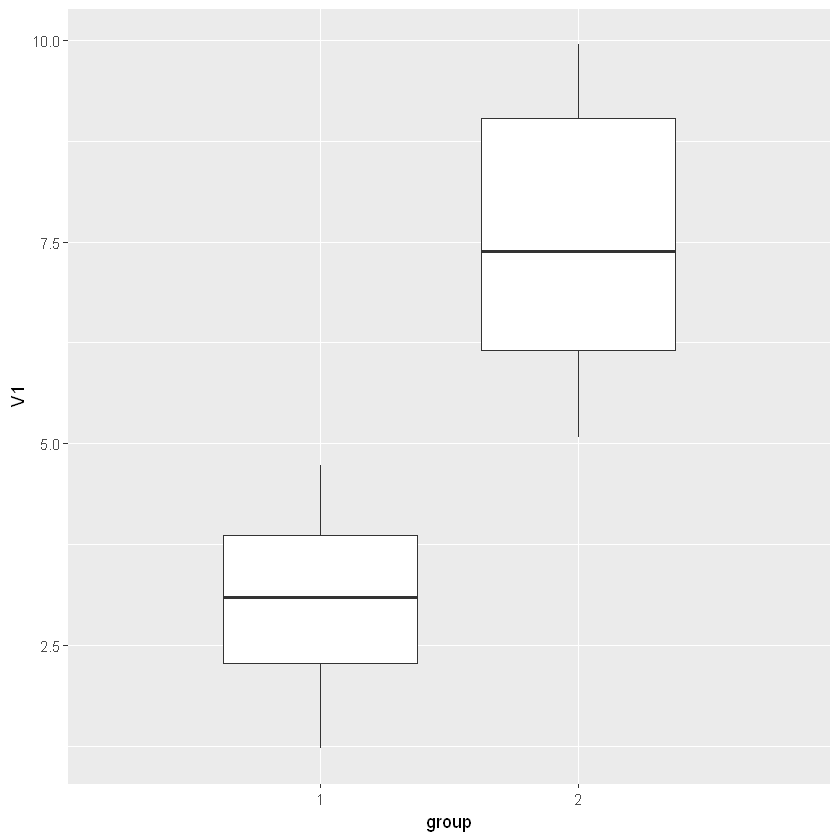

In [33]:
first_plot <-ggplot(data = df1, aes(group=group,x= group, y = V1)) + 
geom_boxplot() + 
scale_x_discrete(limit = c('1', '2'))
    

first_plot

###### 1a explanation
***

We specify *data=df1* to use the df1 dataframe. We use *geom_boxplot()* to create a boxplot. We use *scale_x_discrete()* to  indicate that there are only 2 group values which are intigers.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [34]:
reg1 <- lm(data=df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [35]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

###### 1b explanation
***

We use *lm()* for our regression and *summary()* to give an overview of various properties of the regression model. *gvlma()* gives us the diagnostics of the regression. As you can see, it lists all assumptions as acceptable. Subsequently it can be concluded that all assumption of the linear regression are met given a significance level of 0.05.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



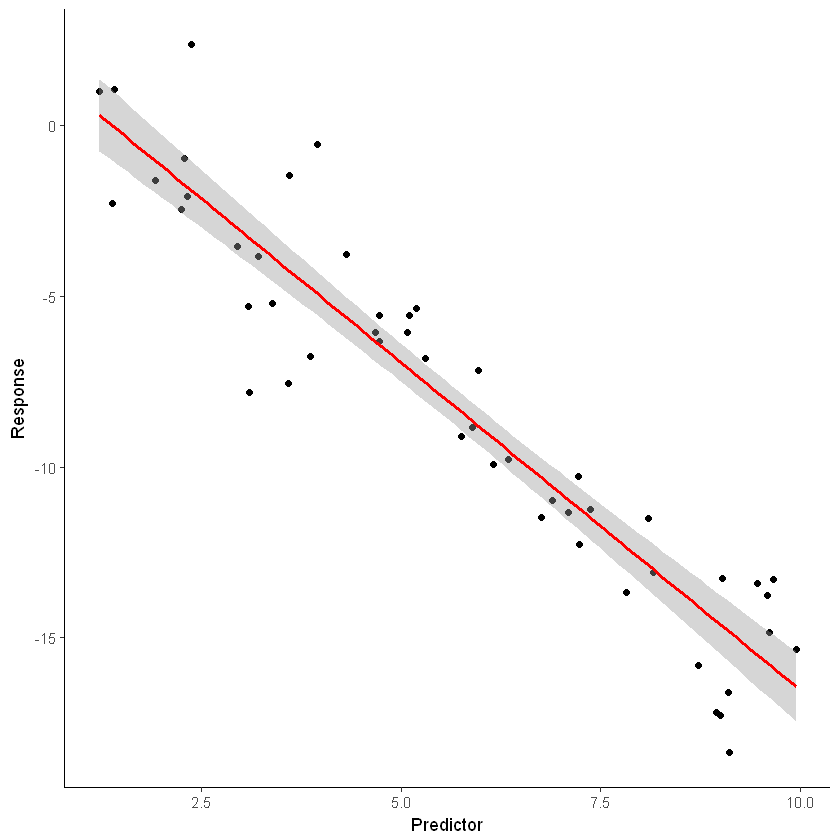

In [36]:
second_plot <- ggplot(data = df1, aes(y= response, x = V1)) 
second_plot + geom_point() + geom_smooth(method = "lm", se = TRUE, color="red") + theme_classic() + xlab("Predictor") + ylab("Response")

###### 1c explanation
***

First we plot a scatter plot using the data of df1 using *geom_point()*. Then we use *geom_smooth()* to generate a regression line, we specify *method = "lm"* for linear regression and *se=true* to include a visual confidence interval. We specify *color=red* within geom_smooth to get a red line, and we label the x and y axis with xlabel and ylabel respectively. Lastly we use *theme_classic()* to give the graph a classic theme.

# Assigment 2

# Packages

In [37]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [38]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


###### 2a explanation
***

We use the function *read.csv2()* to store the csv file into a dataframe called map_municipal. We specify *stringsAsFactors =  FALSE* to not convert strings into factors. We also use *dec = "."* since this dataset uses the dot as a decimal point.

## Assignment 2b

Now you can make an empty map of the Netherlands.

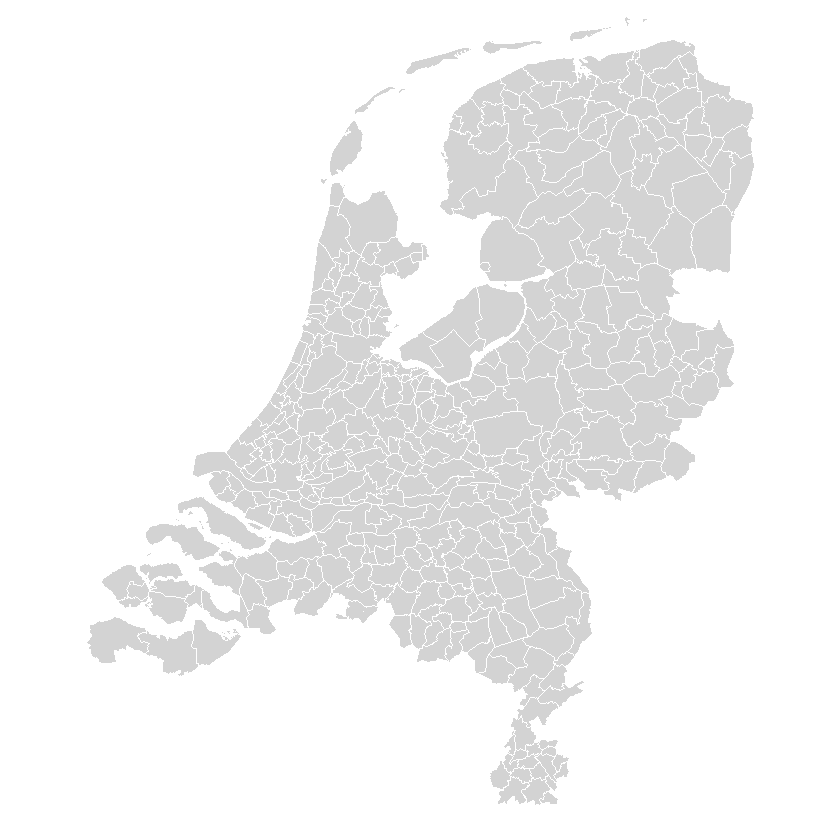

In [39]:
empty_map <- AddMapLayer(MapPlot(), map_municipal)
empty_map

###### 2b explanation
***

We use *AddMapLayer()* to create a blank map. We specify *map_municipal* as our polygon data is stored in that dataframe. We call this new map *empty_map*.

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [40]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


###### 2c explanation
***

We import the csv file into pc4_locations using *read.csv2()*. We then use forward-pipe operators with the *mutate()* function to convert X and Y from characters to numeric values.

## Assignment 2d

### 2di

Read in the school data


In [41]:
schools <- read.csv2("../Sourcedata/schools.csv")

###### 2di explanation
***

We import the csv file into schools using *read.csv2()*

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [42]:
schools1 <- schools %>%
    mutate(PC4 = substr(POSTCODE, 1, 4))

schools1 <- schools1[c('DENOMINATIE','PC4')]

###### 2dii explanation
***

Using a forward-pipe operator we mutate schools using *mutate(PC4 = substr(POSTCODE, 1, 4))* meaning that we only keep the 1st to 4th values of POSTCODE. We store this new data in a column called PC4 and assign the modified dataframe to schools1. We then select only the two required columns in school1 using *schools1 <- schools1[c('DENOMINATIE','PC4')]*

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [43]:
school_loc <- merge(pc4_locations, schools1, by = 'PC4',all = FALSE)
school_loc <- subset(school_loc, DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk")
head(school_loc)

,PC4,X,Y,DENOMINATIE
31,1065,116701.2,485645.8,Protestants-Christelijk
37,1071,120223.0,485571.3,Rooms-Katholiek
50,1077,120152.7,484262.8,Protestants-Christelijk
53,1077,120152.7,484262.8,Rooms-Katholiek
57,1081,118277.6,482449.5,Protestants-Christelijk
80,1132,132947.2,501873.0,Rooms-Katholiek


###### 2diii explanation
***

We use *merge()* to join the two dataframes together, inside *merge()* we first specify the two dataframe that are to be joined. Then we specify *by = 'PC4'* to merge on the basis of the PC4 column and we use *all = FALSE* to remove any rows were the values of the two data frames do not match up, instead of filling the with NaN. We store the new dataframe in *school_loc*.

Subsequently we use *subset()* on school_loc to select only the rows we want. Specifying that *DENOMINATIE* needs to be *"Rooms-Katholiek"* by using *==* and then using the *|* sign to indicate that *DENOMINATIE* can be *"Protestants-Christelijk"* as well.

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


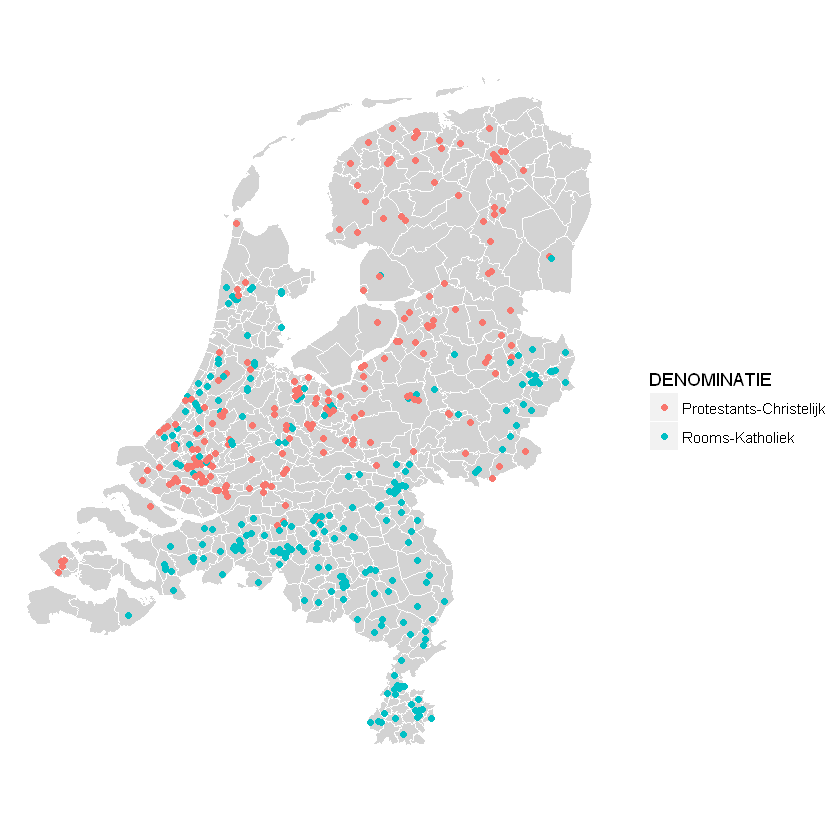

In [44]:
 empty_map %>%
  AddPointsLayer(school_loc, columnNameColor = "DENOMINATIE") 

###### 2e explaination
***

We fill in *empty_map* from 2b using the data from school_loc with *AddPointsLayer()* we specify *columnNameColor = "DENOMINATIE"* to get two seperate colors for the different values of *DENOMINATIE*. A legend is then generated for us.

As you can see is the southern part of the Netherlands there are more Roman Catholic schools, were in the north there are more protestant schools. This is to be expected given the history of the Dutch Revolt.

End of notebook